In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import citipy
import requests
requests.__version__
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress

### Generate random latitudes and longitudes

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. -->unzipping
coordinates = list(lat_lngs)
coordinates

[(-13.09525731403734, -151.88519670004465),
 (-19.912371457026964, 16.098210685426864),
 (-49.73241111200704, -130.57903180419785),
 (71.81968316124329, -158.89979795069388),
 (-48.8727055686116, -63.90885535482602),
 (-0.5899911514273697, -21.692355250146733),
 (74.3934322874477, 128.0966118879553),
 (26.868252424161355, -60.092765424431065),
 (12.607512462976175, 26.646580771146347),
 (62.24384338537183, 73.75022017246835),
 (-49.854300263108065, 13.506490065628952),
 (-26.42061089594791, 155.15852820912295),
 (-34.9196464026646, -90.84751460074153),
 (14.795301705176783, 133.0283020697513),
 (79.77381342440196, 7.906285124462755),
 (21.943732398252237, -163.16761766547327),
 (-23.576153775060078, 168.47959352914347),
 (-8.741929142978705, -178.89821708051173),
 (84.51635036833349, -136.39854347773144),
 (62.0763486998562, -82.04287426435577),
 (-46.29001294302854, -110.39585316875277),
 (-32.57161203475095, -139.0570569696575),
 (-59.80656042224976, -119.15579171593816),
 (-13.01191

### Generate random world cities and find closest cities to lat_lngs coordinates

In [4]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

573

### Retrieve data from OpenWeather API

In [5]:
#Build URL for OpenWeatherMap
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_url=f"{url}&q={city}"

In [6]:
#Get keys through json()
city_weather=requests.get(city_url)
city_weather=city_weather.json()

#Get all keys(in this case it's a list of dictionaries, each key is a dictionary)
# city_data.keys()
city_weather

{'coord': {'lon': 49.8164, 'lat': 7.9803},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 75.45,
  'feels_like': 78.98,
  'temp_min': 75.45,
  'temp_max': 75.45,
  'pressure': 1011,
  'humidity': 82,
  'sea_level': 1011,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 36, 'gust': 7.54},
 'clouds': {'all': 86},
 'dt': 1616978673,
 'sys': {'country': 'SO', 'sunrise': 1616985606, 'sunset': 1617029439},
 'timezone': 10800,
 'id': 60019,
 'name': 'Eyl',
 'cod': 200}

### Get City Weather Data
1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
4. Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
5. Build the city_url or endpoint for each city.
6. Log the URL and the record and set numbers.
7. Make an API request for each city.
8. Parse the JSON weather data for the following:
9. City, country, and date
10. Latitude and longitude
11. Maximum temperature
12. Humidity
13. Cloudiness
14. Wind speed
15. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create counters
record_count=1  #goes through each city in the list
set_count=1     #updates the sets once each set hits 50 cities


Beginning Data Retrieval
------------------------


In [8]:
#Loop through the list of cities and build the city URL

#for i in range(len(cities)): will on give us the index of the city in the list, to get both index and name we need 2 for loops
#instead of using 2 for loops, we use enumerate. 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Run API requests for each of the cities:
    try:
        #Parse JSON and retrieve data:
        city_weather=requests.get(city_url).json()
        #Parse out the needed data:
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather['coord']["lon"]
        city_max_temp=city_weather['main']['temp_max']
        city_humidity=city_weather['main']['humidity']
        city_clouds=city_weather['clouds']['all']
        city_wind=city_weather['wind']['speed']
        city_country=city_weather['sys']['country']
      

        #Convert the data to ISO standards:
        city_date=datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #Append the city information (dictionary) into city_data list:
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")


Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | outjo
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | comodoro rivadavia
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | umm kaddadah
Processing Record 10 of Set 1 | surgut
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | meyungs
City not found. Skipping...
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | hithadhoo

Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | kresttsy
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | mayo
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 4 | tabas
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | parelhas
Processing Record 49 of Set 4 | alice springs
Processing Record 50 of Set 4 | elizabeth city
Processing Record 1 of Set 5 | saskylakh
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | presidencia roque saenz pena
Processing Record 5 of Set 5 | pilar
Processing Record 6 of Set 5 | igrim
Processing Record 7 of Set 5 | bud
Processing Record 8 of Set 5 | sobradinho
Processing Record 9 of Set 5 | lasa
Processing Re

Processing Record 29 of Set 8 | ukiah
Processing Record 30 of Set 8 | leopold
Processing Record 31 of Set 8 | senador jose porfirio
Processing Record 32 of Set 8 | ewa beach
Processing Record 33 of Set 8 | clyde river
Processing Record 34 of Set 8 | kimbe
Processing Record 35 of Set 8 | ndola
Processing Record 36 of Set 8 | chemodanovka
Processing Record 37 of Set 8 | gweta
Processing Record 38 of Set 8 | bemidji
Processing Record 39 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 8 | kolyvan
Processing Record 41 of Set 8 | marfino
Processing Record 42 of Set 8 | sorvag
City not found. Skipping...
Processing Record 43 of Set 8 | igarka
Processing Record 44 of Set 8 | forst
Processing Record 45 of Set 8 | jutai
Processing Record 46 of Set 8 | sechura
Processing Record 47 of Set 8 | bambous virieux
Processing Record 48 of Set 8 | ancud
Processing Record 49 of Set 8 | burica
City not found. Skipping...
Processing Record 50 of Set 8 | temaraia
City not found. Skipping...
P

Processing Record 17 of Set 12 | whitianga
Processing Record 18 of Set 12 | nishihara
Processing Record 19 of Set 12 | fuyang
Processing Record 20 of Set 12 | labutta
City not found. Skipping...
Processing Record 21 of Set 12 | rio de janeiro
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | eyl
--------------------------
Data Retrieval Complete
--------------------------


In [9]:
len(city_data)

526

### Put data into DataFrame

In [10]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,82.81,72,35,21.32,PF,2021-03-29 00:39:47
1,Outjo,-20.1167,16.1500,67.42,48,8,3.56,NA,2021-03-29 00:44:34
2,Rikitea,-23.1203,-134.9692,79.74,71,0,15.01,PF,2021-03-29 00:34:21
3,Barrow,71.2906,-156.7887,-11.20,64,1,13.80,US,2021-03-29 00:35:25
4,Comodoro Rivadavia,-45.8667,-67.5000,57.20,77,0,9.22,AR,2021-03-29 00:40:30
5,Georgetown,5.4112,100.3354,80.01,94,20,3.44,MY,2021-03-29 00:39:39
6,Tiksi,71.6872,128.8694,6.67,90,100,0.72,RU,2021-03-29 00:39:46
7,Saint George,37.1041,-113.5841,75.00,16,1,8.05,US,2021-03-29 00:36:12
8,Umm Kaddadah,13.6017,26.6876,65.37,13,0,15.88,SD,2021-03-29 00:44:34
9,Surgut,61.2500,73.4167,6.80,85,0,6.71,RU,2021-03-29 00:44:35


In [11]:
#Rearrange columns
city_data_df=city_data_df[['City','Country','Date','Lat',"Lng",'Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2021-03-29 00:39:47,-16.4833,-151.7500,82.81,72,35,21.32
1,Outjo,NA,2021-03-29 00:44:34,-20.1167,16.1500,67.42,48,8,3.56
2,Rikitea,PF,2021-03-29 00:34:21,-23.1203,-134.9692,79.74,71,0,15.01
3,Barrow,US,2021-03-29 00:35:25,71.2906,-156.7887,-11.20,64,1,13.80
4,Comodoro Rivadavia,AR,2021-03-29 00:40:30,-45.8667,-67.5000,57.20,77,0,9.22
...,...,...,...,...,...,...,...,...,...
521,Nishihara,JP,2021-03-29 00:38:40,26.1842,127.7558,73.40,88,75,5.75
522,Fuyang,CN,2021-03-29 00:45:59,32.9000,115.8167,64.35,72,0,12.97
523,Rio De Janeiro,BR,2021-03-29 00:42:55,-22.9028,-43.2075,82.99,78,0,5.75
524,Cayenne,GF,2021-03-29 00:40:08,4.9333,-52.3333,80.60,78,40,9.22


In [12]:
#Export as CSV file

#create the output file (CSV in the weather_data folder)
output_data_file='weather_data/cities.csv'

#Export 
city_data_df.to_csv(output_data_file,index_label="City ID")

### Plot Latitude vs. Temperature

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

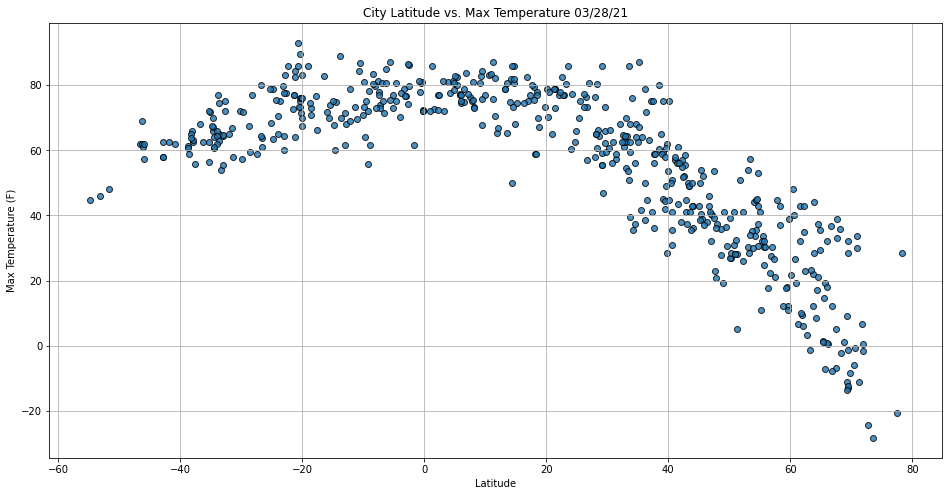

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

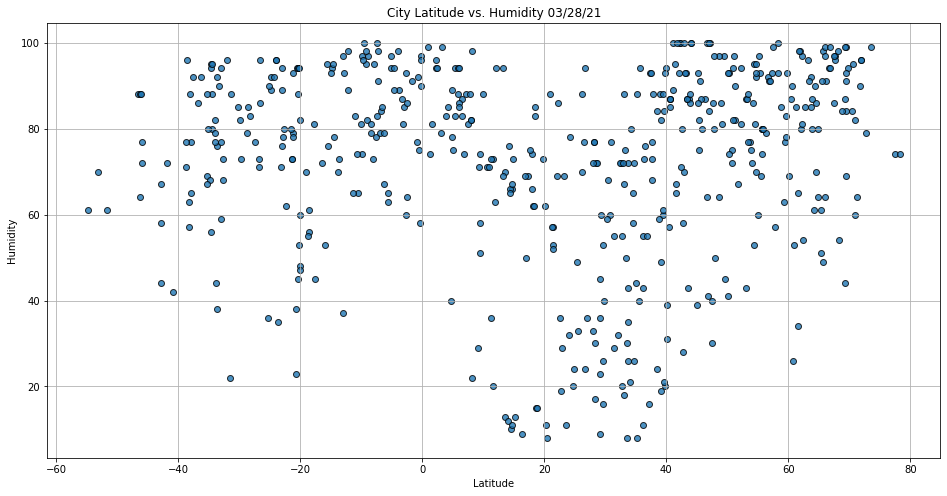

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

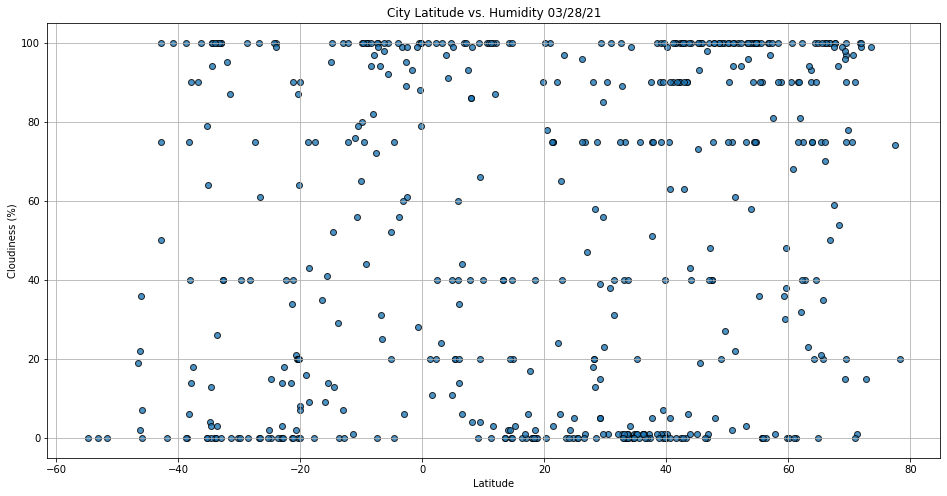

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

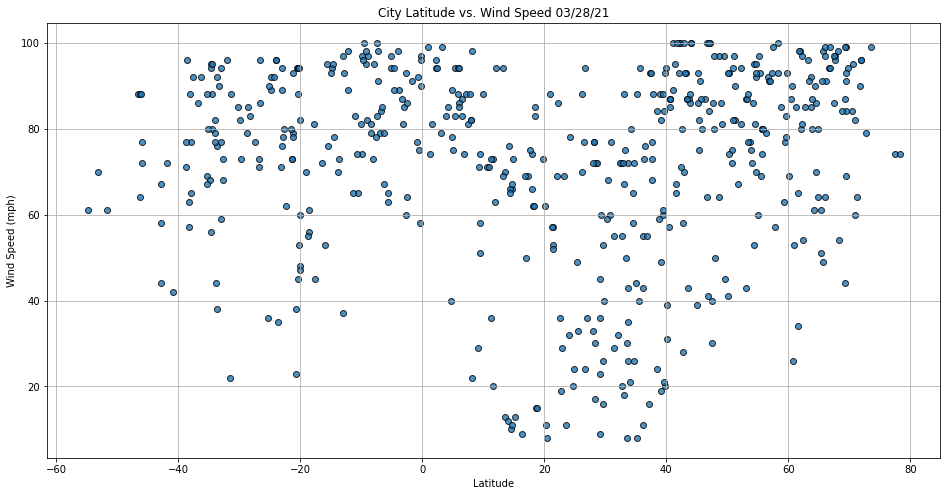

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

### Create Linear Regression Function

In [18]:
#Create a linear regression function
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    
    #Calculate regression line y values from the slope and intercept.
    regress_values=x_values*slope+intercept
    
    #Get the line equation:
    line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    #Plot the data (scatter plot and regression line)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,color='darkred')
    
    #Annotate the text for the line equation:
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='darkred')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    #print r-value
    print(f'r-value: {round(r_value,2)}')

In [19]:
#Create Northern and Southern Hemisphere DataFrames:
#use loc method (df.loc[(condition)])
northern_hemi_df=city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

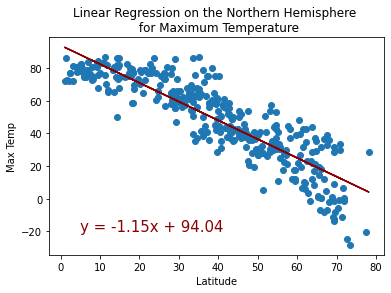

r-value: -0.88


In [20]:
#Perform linear Regression using the defined function
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(5,-20))

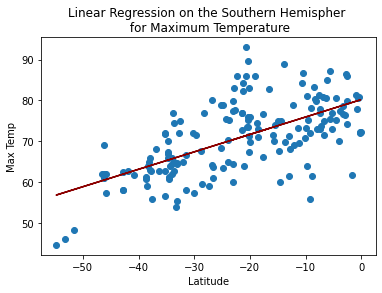

r-value: 0.63


In [21]:
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemispher \n for Maximum Temperature','Max Temp',(-30,40))



##### The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. 

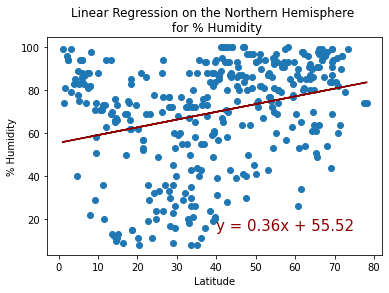

r-value: 0.28


In [22]:
#Perform linear Regression using the defined function
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity','% Humidity',(40,15))

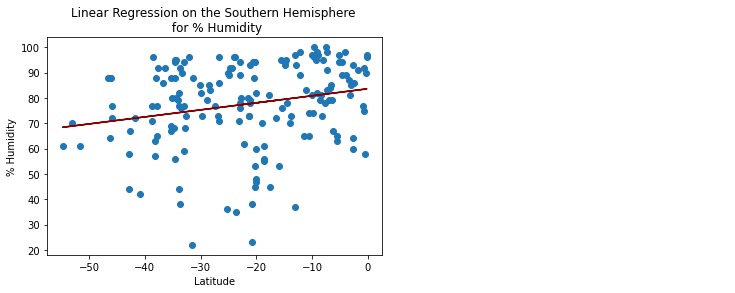

r-value: 0.22


In [23]:
#Perform linear Regression using the defined function
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity','% Humidity',(40,15))

##### The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

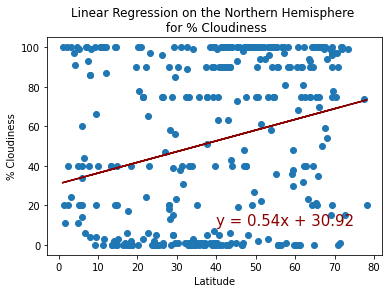

r-value: 0.26


In [24]:
#Perform linear Regression using the defined function
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness','% Cloudiness',(40,10))

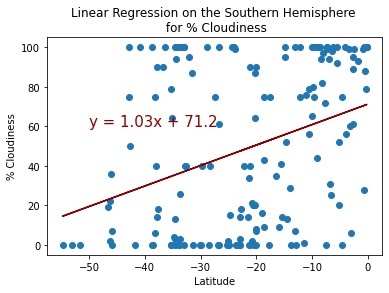

r-value: 0.34


In [25]:
#Perform linear Regression using the defined function
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness','% Cloudiness',(-50,60))

##### The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 

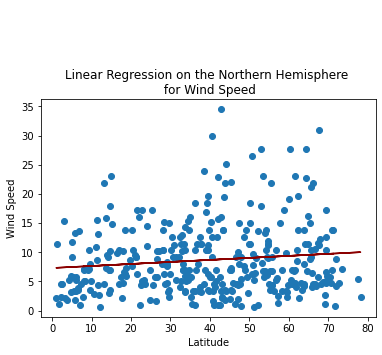

r-value: 0.11


In [26]:
#Perform linear Regression using the defined function
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed','Wind Speed',(0,50))

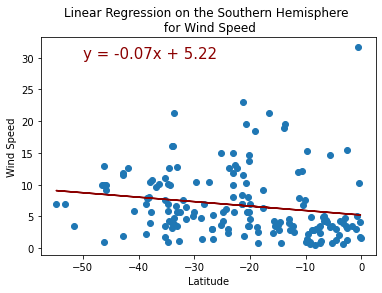

r-value: -0.18


In [27]:
#Perform linear Regression using the defined function
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed','Wind Speed',(-50,30))

##### The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.